$$\mbox{ADASYN: Adaptive Synthetic Sampling}$$
$$\mbox{Miguel Angel Malagón}$$

Continuando con el análisis de técnicas de balanceo de una muestra vamos a explicar y realizar un ejemplo aplicativo utilizando la técnica **ADASYN**.

El algoritmo de balanceo ADASYN se utiliza cuando tengo problemas de desequilibrio de clases en conjuntos de datos. Es decir, si quisiera investigar sobre los pacientes que padecen cierta enfermedad terminal, al tomar una muestra de la población siendo esta aleatoria y representativa, noto que el total de pacientes sin la enfermedad es significativamente mayor que el total de pacientes que la padecen, 560 y 40, respectivamente de una muestra de 600 pacientes. A lo que se podría esperar es que la clase minoritaria al momento de realizar el modelo no tenga una relevancia en el mismo, por lo que hay a través de una técnica de balanceo de muestra debo corregir ese problema.

ADASYN utiliza una distribución ponderada para diferentes clases minoritarias, (pacientes con la enfermedad), que son más difíciles de relacionar, haciendo muestra sintéticas para cada dato minoritario a través de la técnica de k-neighbors, a tal punto de generar nuevos datos de acuerdo con características similares entre las observaciones. Cade resaltar que la principal diferencia entre la técnica SMOTE es la manera como se generan las muestras sintéticas, SMOTE, lo hace a través de una interpolación fija, mientras que ADASYN se centra en las clases difíciles para identificar y genera las muestras en ese lugar.


**Pasos para realizar el algoritmo ADASYN**

**PASO 1: Calcular la proporción de datos minoritarios a mayoritarios**

$$d = \dfrac{m_{s}}{m_{l}}$$
$$\text{m_s: Clase minoritaria ; m_l: Clase mayoritaria}$$

En la investigación a realizar usted debe establecer un umbral adecuado para su modelo, si d es menor a dicho umbral, debe aplicar el algoritmo.

**PASO 2: Calcular el número total de datos de minorías sintéticas a generar**

$$G = (m_{l}-m_{s})\beta$$

$\beta$ Es la proporción de datos minoritarios deseados después de aplicar el algoritmo, donde $\beta = 1$ significa una muestra perfectamente equilibrada.

**PASO 3: Definir el valor $r_{i}$**

- Definir el parámetro de K-eighbors (K)

$$r_{i} = \dfrac{\# mayoria}{K}$$


**PASO 4: Normalize $r_{i}$:**

Lo que se busca es que los valores de $r_{i}$ sean iguales a 1.

$$\hat{r}_{i} = \dfrac{r_{i}}{\sum{r_{i}}}$$

$$\text{Donde:  } \sum{r_{i}}=1$$

Este paso se hace para faciliar el paso 5


**PASO 5: Cantidad de muestras sintéticas a generar por vecindario**

En este paso el algoritmo de manera adaptativa a generar la muestra correspondiente en aquellos vecindarios donde los datos son más difíciles de entender y agrupar.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import ADASYN

In [2]:
bank = pd.read_csv('bank-full.csv', sep=';')

In [ ]:
bank = bank[bank['education'] != 'unknown']
le = preprocessing.LabelEncoder()

colunas = ["default", "housing", "loan", "y", "education", "marital", "poutcome",
           "contact"]

df_col=list(colunas)

for i in range(len(df_col)):
    bank[df_col[i]] = le.fit_transform(bank[df_col[i]])

In [ ]:
#bank.month = pd.to_datetime(bank.month).dt.month

In [4]:
bank.education.unique()

array([2, 1, 0])

In [5]:
bank = pd.get_dummies(bank)
bank.head().T

,0,1,2,5,6
age,58,44,33,35,28
marital,1,2,1,1,2
education,2,1,1,2,2
default,0,0,0,0,0
balance,2143,29,2,231,447
housing,1,1,1,1,1
loan,0,0,1,0,1
contact,2,2,2,2,2
day,5,5,5,5,5
duration,261,151,76,139,217


<Axes: xlabel='y', ylabel='count'>

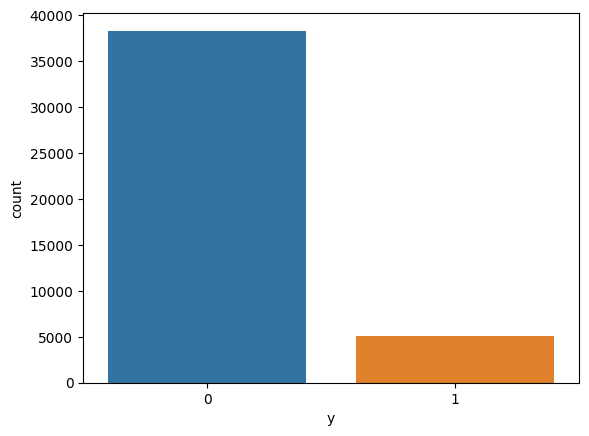

In [6]:
sns.countplot(x = 'y', data = bank,
             order = bank['y'].value_counts().index)

In [7]:
X = bank.drop("y", axis = 1)
y = bank.y

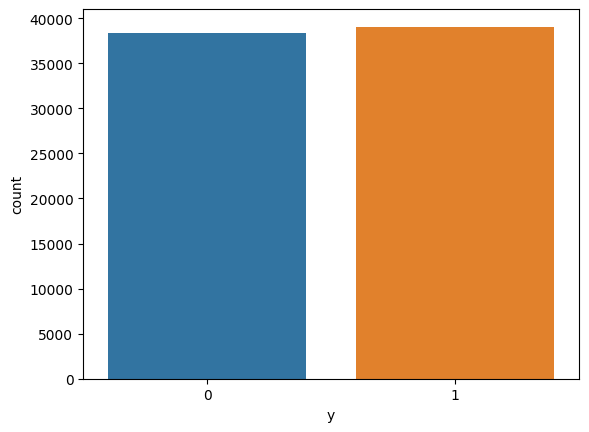

In [8]:
X, y = ADASYN().fit_resample(X, y)
ax = sns.countplot(x=y)

**Referencia**

- Haibo He, Yang Bai, E. A. Garcia and Shutao Li, "ADASYN: Adaptive synthetic sampling approach for imbalanced learning," 2008 IEEE International Joint Conference on Neural Networks (IEEE World Congress on Computational Intelligence), Hong Kong, 2008, pp. 1322-1328, doi: 10.1109/IJCNN.2008.4633969.